In [1]:
import torch
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [2]:
training_data = np.load('data.npy', allow_pickle=True)
training_labels = np.load('labels.npy', allow_pickle=True)

In [3]:
def encode_labels(labels):
    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)
    labels_encoded = to_categorical(labels_encoded)
    
    return labels_encoded

In [6]:
lbls = encode_labels(training_labels)

In [8]:
#convert all images to grayscale and normalize them to 0-1
def preprocess_data(data):
    data = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in data]
    data = [img/255 for img in data]
    return data

training_data = preprocess_data(training_data)

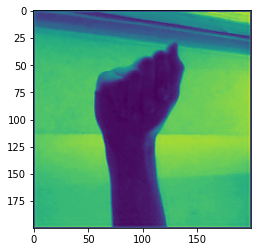

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


In [81]:
data = []

for i in range(len(training_data)): 
    data.append([training_data[i], lbls[i]])

class CustomDataset(Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        #if self.transform:
        #    sample = self.transform(sample)
        return sample

    def transform(self, sample):
        return sample
    
    def plot(self, idx):
        sample = self.data[idx]
        plt.imshow(sample[0])
        plt.show()
        print(sample[1])

class ToTensor(object):
    def __call__(self, sample):
        image, label = sample[0], sample[1]
        #image = image.transpose((2, 0, 1))
        return torch.from_numpy(image), label
    
    
# load the custom dataset
custom_dataset = CustomDataset(data, transform=ToTensor())

# plot the first image
custom_dataset.plot(0)


In [82]:
labels_map = {}
for i, label in enumerate(training_labels):
    if label not in labels_map:
        labels_map[i] = label

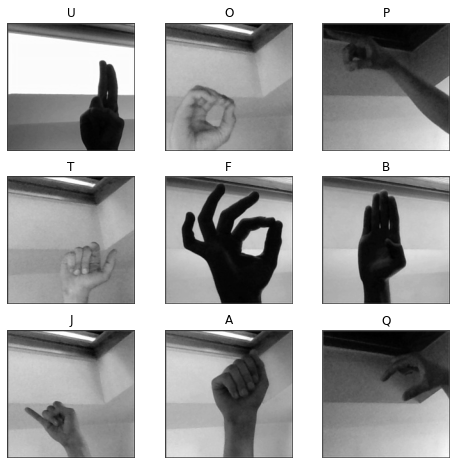

In [83]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx], training_labels[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [84]:
train_size = int(0.8 * len(custom_dataset))
test_size = len(custom_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(custom_dataset, [train_size, test_size])

In [85]:
#sample from train_dataset
train_dataset.dataset[0]

[array([[0.30196078, 0.29019608, 0.29803922, ..., 0.29411765, 0.30588235,
         0.29019608],
        [0.29411765, 0.27843137, 0.26666667, ..., 0.25490196, 0.25098039,
         0.29411765],
        [0.28235294, 0.2627451 , 0.25882353, ..., 0.76862745, 0.75686275,
         0.21176471],
        ...,
        [0.30588235, 0.23529412, 0.61960784, ..., 0.54509804, 0.61176471,
         0.19607843],
        [0.29411765, 0.27843137, 0.63921569, ..., 0.61568627, 0.61176471,
         0.23921569],
        [0.29803922, 0.28235294, 0.22745098, ..., 0.20392157, 0.23921569,
         0.22745098]]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)]

In [86]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 200, 200])
Labels batch shape: torch.Size([64, 29])


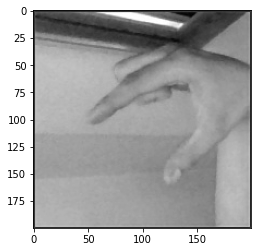

Label: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [87]:
#n gray scale images
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [93]:
from model import *

In [94]:
net = Net()

net.train(train_dataloader)

ValueError: axes don't match array